In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from math import log
from sklearn import preprocessing

/Users/Michael/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Gonna get freaky

In [2]:

avocado = pd.read_csv('avocado_lon_lat.csv', index_col=0)
avocado.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,lon,lat
Date,,,,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,-73.754968,42.651167
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,-73.754968,42.651167
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,-73.754968,42.651167
2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,-73.754968,42.651167
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,-73.754968,42.651167


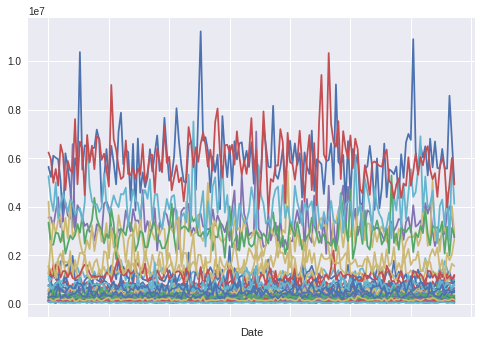

In [0]:
avo.groupby('region')['Total Volume'].plot()
plt.show()

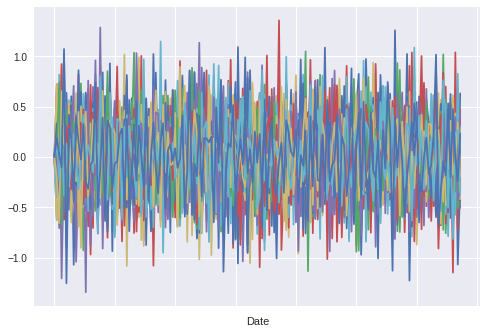

In [0]:
avo['logVol'] = avo.groupby('region')['Total Volume'].transform(np.log)
avo['logDiffVol'] = avo.groupby('region').logVol.diff().fillna(0)
avo.groupby('region').logDiffVol.plot()
plt.show()

In [0]:
avo.to_csv('avo.csv')

Starting Factor Model here!

$price = \bar{price} + lat*price_{diff} + lon*price_{diff} + volume + noise$

$-noise = \bar{price} + lat*price_{diff} + lon*price_{diff} + volume - price$

In [0]:
avo = avocado[avocado.type == 'conventional'][['AveragePrice', 'lon', 'lat', 'region', 'Total Volume']]
avo.head()

,AveragePrice,lon,lat,region,Total Volume
Date,,,,,
2015-12-27,1.33,-73.754968,42.651167,Albany,64236.62
2015-12-20,1.35,-73.754968,42.651167,Albany,54876.98
2015-12-13,0.93,-73.754968,42.651167,Albany,118220.22
2015-12-06,1.08,-73.754968,42.651167,Albany,78992.15
2015-11-29,1.28,-73.754968,42.651167,Albany,51039.60


In [0]:
avo.sort_index(inplace=True)
avo.sort_values('region')

,AveragePrice,lon,lat,region,Total Volume
Date,,,,,
2017-04-23,1.34,-73.754968,42.651167,Albany,89327.10
2017-07-09,1.52,-73.754968,42.651167,Albany,101331.41
2015-10-25,1.07,-73.754968,42.651167,Albany,74338.76
2015-11-01,1.02,-73.754968,42.651167,Albany,99811.42
2017-07-02,1.56,-73.754968,42.651167,Albany,98282.07
2015-05-31,1.23,-73.754968,42.651167,Albany,95123.62
2017-06-25,1.53,-73.754968,42.651167,Albany,89303.04
2015-11-08,0.98,-73.754968,42.651167,Albany,109428.33
2017-06-18,1.58,-73.754968,42.651167,Albany,97079.34


In [0]:
temp = min_max_scaler.fit_transform(x)

NameError: ignored

In [0]:
avo = avo[avo.region != 'Southeast']
avo = avo[avo.region != 'NorthernNewEngland']
avo = avo[avo.region != 'WestTexNewMexico']
avo = avo[avo.region != 'West']
avo = avo[avo.region != 'TotalUS']

In [0]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
x = avo[['lon']].values.astype(float)
lon_scaled = min_max_scaler.fit_transform(x)
avo['lon_scaled'] = lon_scaled
x = avo[['lat']].values.astype(float)
lat_scaled = min_max_scaler.fit_transform(x)
avo['lat_scaled'] = lat_scaled
avo.head()

,AveragePrice,lon,lat,region,Total Volume,lon_scaled,lat_scaled
Date,,,,,,,
2015-01-04,0.93,-118.755997,36.701463,California,5777334.90,-0.848179,-0.001338
2015-01-04,1.10,-75.163576,39.952415,Philadelphia,407675.56,0.840929,0.295774
2015-01-04,1.40,-77.615214,43.157285,BuffaloRochester,116253.44,0.745934,0.588674
2015-01-04,0.80,-115.149225,36.166286,LasVegas,317861.35,-0.708424,-0.050249
2015-01-04,1.00,-81.379039,28.542110,Orlando,281803.19,0.600094,-0.747040


In [0]:
avo['logPrice'] = avo.AveragePrice.apply(np.log)
avo['logPriceDiff'] = avo.groupby('region').logPrice.transform(pd.Series.diff).fillna(0)
avo.head()

,AveragePrice,lon,lat,region,Total Volume,lon_scaled,lat_scaled,logPrice,logPriceDiff
Date,,,,,,,,,
2015-01-04,0.93,-118.755997,36.701463,California,5777334.90,-0.848179,-0.001338,-0.072571,0.0
2015-01-04,1.10,-75.163576,39.952415,Philadelphia,407675.56,0.840929,0.295774,0.095310,0.0
2015-01-04,1.40,-77.615214,43.157285,BuffaloRochester,116253.44,0.745934,0.588674,0.336472,0.0
2015-01-04,0.80,-115.149225,36.166286,LasVegas,317861.35,-0.708424,-0.050249,-0.223144,0.0
2015-01-04,1.00,-81.379039,28.542110,Orlando,281803.19,0.600094,-0.747040,0.000000,0.0


In [0]:
#avo.groupby('region').logPriceDiff.mean()

In [0]:
first_day = avo[avo.index == '2015-01-11']
first_day.sort_values('region', inplace=True)
avo.sort_values('region', inplace=True)
first_day.set_index('region', inplace=True)
first_day['region_mean'] = avo.groupby('region').logPriceDiff.mean()
first_day.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,AveragePrice,lon,lat,Total Volume,lon_scaled,lat_scaled,logPrice,logPriceDiff,region_mean
region,,,,,,,,,
Albany,1.24,-73.754968,42.651167,41195.08,0.895510,0.542419,0.215111,0.016261,0.001492
Atlanta,1.11,-84.390185,33.749099,397542.72,0.483419,-0.271162,0.104360,0.104360,0.000232
BaltimoreWashington,1.17,-76.610759,39.290882,670231.94,0.784854,0.235315,0.157004,0.080043,0.000770
Boise,1.18,-116.200835,43.616560,57355.52,-0.749172,0.630649,0.165514,0.155564,0.001402
Boston,1.10,-71.058291,42.360253,437771.89,1.000000,0.515832,0.095310,0.075508,0.001831


In [0]:
len(first_day)

49

In [0]:
first_day.head()

,AveragePrice,lon,lat,Total Volume,lon_scaled,lat_scaled,logPrice,logPriceDiff,region_mean
region,,,,,,,,,
Albany,1.24,-73.754968,42.651167,41195.08,0.895510,0.542419,0.215111,0.016261,0.001492
Atlanta,1.11,-84.390185,33.749099,397542.72,0.483419,-0.271162,0.104360,0.104360,0.000232
BaltimoreWashington,1.17,-76.610759,39.290882,670231.94,0.784854,0.235315,0.157004,0.080043,0.000770
Boise,1.18,-116.200835,43.616560,57355.52,-0.749172,0.630649,0.165514,0.155564,0.001402
Boston,1.10,-71.058291,42.360253,437771.89,1.000000,0.515832,0.095310,0.075508,0.001831


In [0]:
avo['Date'] = avo.index
temp = avo.copy()
temp.set_index('region', inplace=True)
y = temp.groupby('Date').apply(lambda row: row.logPriceDiff)
X = temp.groupby('Date').apply(lambda row: np.column_stack([[1]*len(row.lat_scaled),list(row.lat_scaled),list(row.lon_scaled)]))
#avo.groupby('Date').apply(lambda row: y=row.logPriceDiff, np.column_stack([[1]*len(first_day.logPriceDiff),list(first_day.lat_scaled),list(first_day.lon_scaled)]))



In [0]:
y = y.as_matrix()

In [0]:
betas = []
for idx in range(len(y)):
  betas.append(np.dot(np.dot(np.linalg.inv(np.dot(X[idx].T, X[idx])), X[idx].T), y[idx]))

In [0]:
betas

[array([0., 0., 0.]),
 array([ 0.08236364, -0.01202543,  0.04751364]),
 array([ 0.03646825, -0.01661353, -0.04773797]),
 array([-0.01152362,  0.01944972, -0.02224158]),
 array([-0.16532147,  0.05238671,  0.03175388]),
 array([ 0.08738139, -0.09331095, -0.02388956]),
 array([0.08205925, 0.07618949, 0.00088253]),
 array([-0.02648812, -0.02161343,  0.01133521]),
 array([-0.05510674, -0.02938763,  0.00560453]),
 array([ 0.07480691, -0.02425597, -0.02571612]),
 array([0.02286503, 0.03066776, 0.00761157]),
 array([-0.07174043,  0.05165383, -0.05000806]),
 array([ 0.04639789, -0.07581154,  0.02988867]),
 array([0.01567229, 0.09191603, 0.00551122]),
 array([-0.04014921,  0.05017088, -0.01213662]),
 array([ 0.00692614, -0.13070471,  0.05574651]),
 array([ 0.03747739,  0.01025514, -0.01520956]),
 array([-0.12569595,  0.07361394,  0.02334346]),
 array([ 0.08682264, -0.07955547,  0.00695077]),
 array([ 0.03045688,  0.00558205, -0.04182897]),
 array([-0.02781779,  0.05793078, -0.02823157]),
 array(

In [0]:
np.asarray(betas).tofile('betas_int_lat_lon.npy')

In [0]:
#np.dot(X.T, X)
np.dot(X.as_matrix()[0].T, X.as_matrix()[0])

array([[49.        ,  5.30344847, 10.27179753],
       [ 5.30344847, 10.82059597, -0.07340356],
       [10.27179753, -0.07340356, 21.53575349]])

In [0]:
first_day = avo[avo.index == '2015-01-11']
first_day.sort_values('region', inplace=True)
avo.sort_values('region', inplace=True)
first_day.set_index('region', inplace=True)
y = np.asarray(first_day.logPriceDiff)
X = np.column_stack([[1]*len(first_day.logPriceDiff),list(first_day.lat_scaled),list(first_day.lon_scaled)])
Betas = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

In [0]:
#first_day
y = np.asarray(first_day.logPriceDiff)
X = np.column_stack([[1]*len(first_day.logPriceDiff),list(first_day.lat_scaled),list(first_day.lon_scaled)]) # add in volume, etc

# do anova for the models to see which factors help the most <--- also look at SSE

# probably a lot of mean reversion in the factors over time

#print(y, X)
Betas = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
# on average all prices went up 0.08, and each unit lon

In [0]:
error = y - np.dot(X, Betas.T)

sse = np.dot(error, error)

sse

0.3428979498272399

In [0]:
error

array([-0.10212923, -0.00423347, -0.03678246,  0.11638017, -0.04816663,
       -0.01541644, -0.05289059, -0.05634101, -0.05830593, -0.0580342 ,
       -0.01824851, -0.06015314,  0.03213325, -0.03462391, -0.01526248,
       -0.02169813,  0.06707535,  0.14249136,  0.00126026,  0.10461805,
        0.09539758,  0.10126477, -0.04593455,  0.03105038,  0.15223521,
       -0.04675141, -0.03389336, -0.07089568,  0.08641915,  0.08884663,
        0.13478243,  0.10801086, -0.12146381, -0.09626681,  0.00096286,
        0.05407541, -0.08415921, -0.09969064, -0.08667234,  0.00241568,
       -0.18596701,  0.00552285,  0.06521051, -0.03058055, -0.06297526,
        0.03516312,  0.02234032, -0.02716425,  0.12704482])

In [0]:
error

array([-0.07476178,  0.01333771, -0.01097959,  0.06454181, -0.01551475,
        0.00428788, -0.10183322, -0.03386389, -0.05562038, -0.04657054,
       -0.00494769, -0.06435406,  0.00520573, -0.02401159, -0.01017021,
       -0.01551475,  0.09129925,  0.17279229,  0.00300665,  0.11231862,
        0.12175846,  0.05955056, -0.0910223 ,  0.04114947,  0.18629698,
       -0.02932873, -0.02336365, -0.05960611,  0.11546962,  0.06966008,
        0.16361992,  0.13575102, -0.15453571, -0.07795022, -0.01479494,
       -0.01177293, -0.05823248, -0.07347799, -0.06481993, -0.05363477,
       -0.22759784, -0.05141316, -0.00229419, -0.00566245, -0.05280109,
       -0.02336365,  0.02385797, -0.00463769,  0.15454828])

look for a pattern for the factors... ARIMA for the OLS output

In [0]:
avo[avo.index == '2015-01-04']

,AveragePrice,lon,lat,region,Total Volume,logPrice,logPriceDiff,lon_scaled,lat_scaled
Date,,,,,,,,,
2015-01-04,0.93,-118.755997,36.701463,California,5777334.90,-0.072571,0.0,-0.935990,-0.185120
2015-01-04,1.10,-75.163576,39.952415,Philadelphia,407675.56,0.095310,0.0,-0.223841,0.057315
2015-01-04,1.40,-77.615214,43.157285,BuffaloRochester,116253.44,0.336472,0.0,-0.263892,0.296314
2015-01-04,0.80,-115.149225,36.166286,LasVegas,317861.35,-0.223144,0.0,-0.877068,-0.225030
2015-01-04,1.00,-81.379039,28.542110,Orlando,281803.19,0.000000,0.0,-0.325380,-0.793592
2015-01-04,1.00,-117.421226,47.657942,Spokane,84612.39,0.000000,0.0,-0.914185,0.631944
2015-01-04,1.02,-71.058291,42.360253,Boston,491738.00,0.019803,0.0,-0.156775,0.236876
2015-01-04,0.85,-118.242767,34.053683,LosAngeles,2682159.95,-0.162519,0.0,-0.927606,-0.382574
2015-01-04,1.05,-0.249199,52.593419,NorthernNewEngland,321823.77,0.048790,0.0,1.000000,1.000000


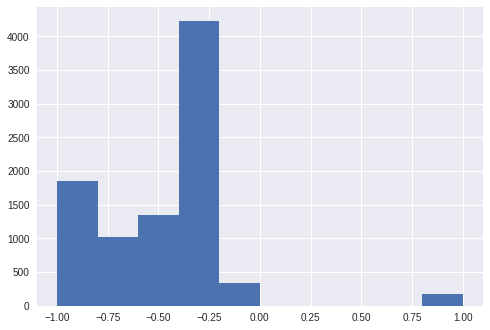

In [0]:
avo.lon_scaled.hist()
plt.show()

In [0]:
# 169
avo.sort_index(inplace=True)
avo.sort_values('region')
price = np.asarray(avo.AveragePrice)
#temp = avo.groupby('region').AveragePrice
#temp.
price = price.reshape((54, 169))
len(price.T[0])

54

In [0]:
y

array([0.93, 0.8 , 1.06, 1.14, 1.25, 1.06, 1.26, 1.02, 1.31, 0.99, 1.03,
       1.15, 0.93, 0.89, 0.8 , 0.81, 0.94, 0.97, 1.22, 0.67, 0.89, 0.61,
       1.09, 0.86, 1.07, 1.15, 1.1 , 1.14, 1.04, 1.4 , 1.99, 1.73, 0.63,
       0.94, 1.48, 0.9 , 0.65, 1.6 , 1.22, 1.13, 1.13, 1.45, 1.28, 1.32,
       1.42, 1.54, 1.83, 1.22, 1.23, 1.03, 1.27, 1.31, 1.1 , 1.17])

In [0]:
y = np.diff(np.log(price.T[0]))
y = np.insert(y, 0, 0)

In [0]:
y

array([ 0.        , -0.15057286,  0.28141246,  0.07275935,  0.09211529,
       -0.16487464,  0.17284281, -0.21130909,  0.25022451, -0.28007747,
        0.03960914,  0.11020314, -0.21233264, -0.04396312, -0.10660974,
        0.01242252,  0.14884563,  0.0314162 ,  0.22931007, -0.59932843,
        0.28394375, -0.37776251,  0.58047402, -0.23700059,  0.21848154,
        0.07210329, -0.04445176,  0.03571808, -0.09180755,  0.29725152,
        0.3516624 , -0.14001323, -1.01015687,  0.40016006,  0.45391749,
       -0.4974026 , -0.3254224 ,  0.90078655, -0.27115277, -0.07663323,
        0.        ,  0.24934592, -0.12470348,  0.03077166,  0.07302514,
        0.08112554,  0.17253355, -0.40546511,  0.00816331, -0.17745537,
        0.2094581 ,  0.03101024, -0.17471696,  0.06169357])

In [0]:
print(len([1]*54), len(list(avo[avo.region == 'Albany'].lat)))

54 169


In [0]:
#price = price.reshape((54, 169))
#np.asarray([1]*52) + price[0]

X = np.column_stack([[1]*169, list(avo[avo.region == 'Albany'].lat)])
X


array([[ 1.       , 42.6511674],
       [ 1.       , 42.6511674],
       [ 1.       , 42.6511674],
       [ 1.       , 42.6511674],
       [ 1.       , 42.6511674],
       [ 1.       , 42.6511674],
       [ 1.       , 42.6511674],
       [ 1.       , 42.6511674],
       [ 1.       , 42.6511674],
       [ 1.       , 42.6511674],
       [ 1.       , 42.6511674],
       [ 1.       , 42.6511674],
       [ 1.       , 42.6511674],
       [ 1.       , 42.6511674],
       [ 1.       , 42.6511674],
       [ 1.       , 42.6511674],
       [ 1.       , 42.6511674],
       [ 1.       , 42.6511674],
       [ 1.       , 42.6511674],
       [ 1.       , 42.6511674],
       [ 1.       , 42.6511674],
       [ 1.       , 42.6511674],
       [ 1.       , 42.6511674],
       [ 1.       , 42.6511674],
       [ 1.       , 42.6511674],
       [ 1.       , 42.6511674],
       [ 1.       , 42.6511674],
       [ 1.       , 42.6511674],
       [ 1.       , 42.6511674],
       [ 1.       , 42.6511674],
       [ 1

In [0]:
y = price.T[0].T

In [0]:
X.T * X * X.T * y

array([[ 0.        , -0.15057286,  0.28141246, ...,  0.03101024,
        -0.17471696,  0.06169357],
       [ 0.        , -0.15057286,  0.28141246, ...,  0.03101024,
        -0.17471696,  0.06169357],
       [ 0.        , -0.15057286,  0.28141246, ...,  0.03101024,
        -0.17471696,  0.06169357],
       ...,
       [ 0.        , -0.15057286,  0.28141246, ...,  0.03101024,
        -0.17471696,  0.06169357],
       [ 0.        , -0.15057286,  0.28141246, ...,  0.03101024,
        -0.17471696,  0.06169357],
       [ 0.        , -0.15057286,  0.28141246, ...,  0.03101024,
        -0.17471696,  0.06169357]])

In [0]:
avo.groupby('index')

KeyError: ignored

In [0]:
avo.AveragePrice.apply(lambda x: np.log(x))

In [0]:
#avo.logPrice

In [0]:
#y = column of price per region
#x = column of 1s, and 
avo['logPrice'] = avo.AveragePrice.apply(np.log)
avo['logPriceDiff'] = avo.groupby('region').logPrice.transform(pd.Series.diff).fillna(0)
avo.head()

,AveragePrice,lon,lat,region,Total Volume,logPrice,logPriceDiff
Date,,,,,,,
2015-01-04,0.93,-118.755997,36.701463,California,5777334.90,-0.072571,0.0
2015-01-04,1.10,-75.163576,39.952415,Philadelphia,407675.56,0.095310,0.0
2015-01-04,0.98,14.520858,59.674971,Southeast,3204112.16,-0.020203,0.0
2015-01-04,1.40,-77.615214,43.157285,BuffaloRochester,116253.44,0.336472,0.0
2015-01-04,0.80,-115.149225,36.166286,LasVegas,317861.35,-0.223144,0.0


In [0]:
len(y)

8788

In [0]:
np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

array([ 0.06325422, 43.12711398])

In [0]:
# do OLS on y_i = x_iT B + e_i
# Y = X B + e
# hat(B) = (X^TX)^-1X^T Y


In [0]:
#avocado.Date = pd.to_datetime(avocado.Date)
#avocado = avocado.set_index('Date')
avo = avocado[avocado.type == 'conventional'][['AveragePrice', 'lon', 'lat', 'region', 'Total Volume']]
avo.head()

,AveragePrice,lon,lat,region,Total Volume
Date,,,,,
2015-12-27,1.33,-73.754968,42.651167,Albany,64236.62
2015-12-20,1.35,-73.754968,42.651167,Albany,54876.98
2015-12-13,0.93,-73.754968,42.651167,Albany,118220.22
2015-12-06,1.08,-73.754968,42.651167,Albany,78992.15
2015-11-29,1.28,-73.754968,42.651167,Albany,51039.60


In [0]:
albAvo = avo[avo.region == 'Albany']
albAvo['logPrice'] = albAvo.AveragePrice.apply(log)
mean_price = albAvo.logPrice.mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
albAvo['logPriceDiff'] = albAvo.logPrice.apply(lambda x: x-mean_price)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
errors = 

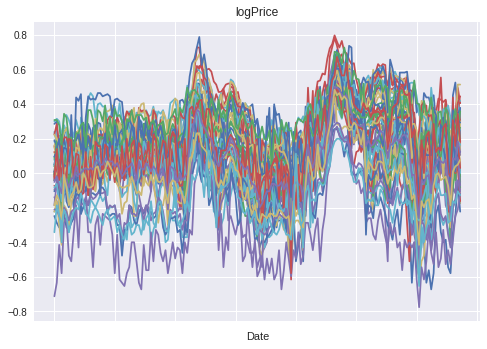

In [0]:
avo['logPrice'] = avo.AveragePrice.apply(log)
avo.groupby('region').logPrice.plot()
plt.title('logPrice')
plt.show()

In [0]:
avo['logPrice'] = avo.AveragePrice.apply(log)
avo['logDiffPriceMonth'] = avo.groupby('region').logPrice.transform(lambda x:x.diff(4))

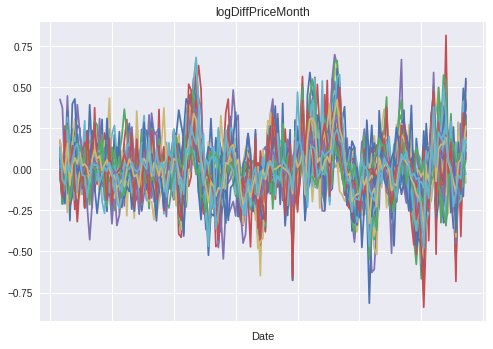

In [0]:
avo.groupby('region').logDiffPriceMonth.plot()
plt.title('logDiffPriceMonth')
plt.show()

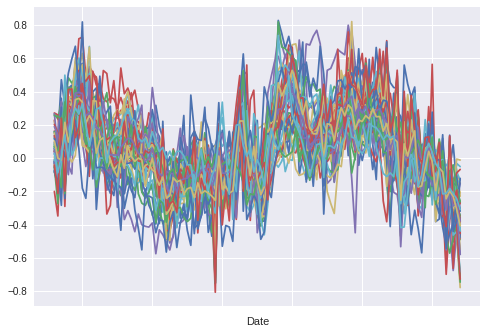

In [0]:
#avo['logYearPrice'] = 
avo['logYearDiffPrice'] = avo.groupby('region')['logPrice'].transform(lambda x: x.diff(52))
avo.groupby('region').logYearDiffPrice.plot()
plt.title('logYearDiffPrice')
plt.show()

In [0]:
avo['logDiffPrice'] = avo.groupby('region').logPrice.diff()
meanLogPrice = avo.groupby('region').logPrice.mean()
meanLogPrice

region
Albany                 0.286488
Atlanta                0.053274
BaltimoreWashington    0.283339
Boise                  0.047832
Boston                 0.251977
BuffaloRochester       0.318411
California             0.080360
Charlotte              0.230992
Chicago                0.287650
CincinnatiDayton      -0.006987
Columbus               0.049277
DallasFtWorth         -0.178556
Denver                 0.054055
Detroit                0.099237
GrandRapids            0.253310
GreatLakes             0.152314
HarrisburgScranton     0.222807
HartfordSpringfield    0.330190
Houston               -0.207797
Indianapolis           0.119389
Jacksonville           0.155498
LasVegas              -0.001347
LosAngeles            -0.051358
Louisville             0.083618
MiamiFtLauderdale      0.206358
Midsouth               0.180171
Nashville             -0.000204
NewOrleansMobile       0.063579
NewYork                0.323364
Northeast              0.286180
NorthernNewEngland     0.218685
O

In [0]:
# noise = 
# \bar{price} + lat*price_{diff} + lon*price_{diff} + volume - price
meanLogPrice + avo.lat*avo.logDiffPrice + avo.lon*avo.logDiffPrice + avo['Total Volume'] - avo.logPrice

In [0]:
avo.head()

,AveragePrice,lon,lat,region,Total Volume,logPrice,logDiffPrice
Date,,,,,,,
2015-12-27,1.33,-73.754968,42.651167,Albany,64236.62,0.285179,NaN
2015-12-20,1.35,-73.754968,42.651167,Albany,54876.98,0.300105,0.014926
2015-12-13,0.93,-73.754968,42.651167,Albany,118220.22,-0.072571,-0.372675
2015-12-06,1.08,-73.754968,42.651167,Albany,78992.15,0.076961,0.149532
2015-11-29,1.28,-73.754968,42.651167,Albany,51039.60,0.246860,0.169899


In [0]:
# avocado['LogAvePriceDiff'] = avocado.AveragePrice.apply(lambda x: np.log(x)).diff()
# avocado.LogAvePriceDiff.plot()
# plt.show()

In [0]:
avocado['LogAveragePrice'] = avocado.AveragePrice.apply(np.log)
avocado.Date = pd.to_datetime(avocado.Date)
avocado.set_index('Date', inplace=True)

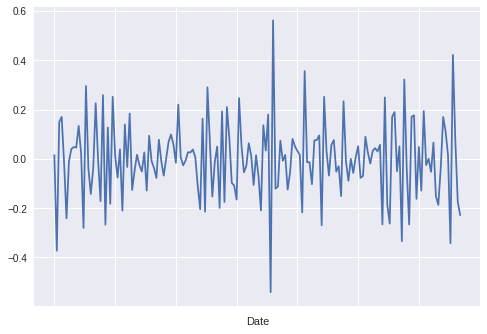

In [0]:

#avocado[avocado.type == 'conventional'].groupby('region').LogAveragePrice.transform(pd.Series.diff)[1:].plot()
avocado[(avocado.type == 'conventional') & (avocado.region == 'Albany')].LogAveragePrice.diff()[1:].plot() # can use volume to explain variance in middle
#avocado.LogAvePriceDiff.plot()
plt.show()

In [0]:
albAvo = avocado[(avocado.type == 'conventional') & (avocado.region == 'Albany')].LogAveragePrice

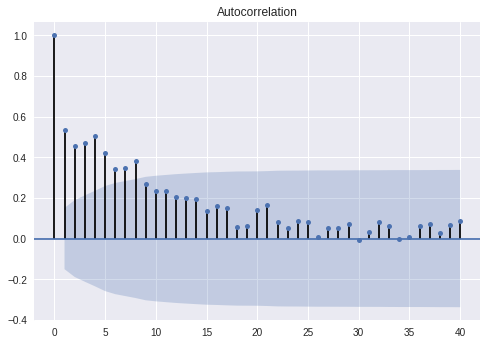

In [0]:
sm.graphics.tsa.plot_acf(albAvo, lags=40)
plt.show() # AR 4 or 5

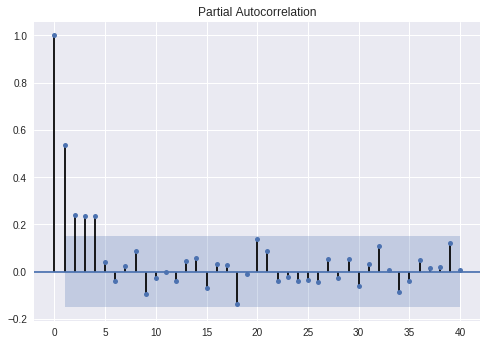

In [0]:
sm.graphics.tsa.plot_pacf(albAvo, lags=40)
plt.show() # MA 1 or 2

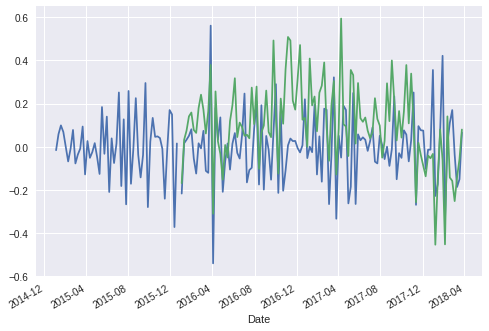

In [0]:
albAvo.diff().plot()
albAvo.diff(52).plot()
plt.show()

In [0]:
# q1 - 1 - 3
# q2 - 4 - 6
# q3 - 7 - 9
# q4 - 10-12

#quarterly_averages = 
albAvo = avocado[(avocado.type == 'conventional') & (avocado.region == 'Albany')].LogAveragePrice

from collections import defaultdict

monthly_total = defaultdict(list)

for month, x in [(row[0].month, row[1]) for row in albAvo.iteritems()]:
  monthly_total[month] += [x]

quarterly_total = defaultdict(list)
for month in monthly_total:
  quarter = (month-1)//3
  quarterly_total[quarter] += monthly_total[month]

quarterly_average = quarterly_total.copy()
for key in quarterly_average:
  quarterly_average[key] = sum(quarterly_average[key])/len(quarterly_average[key])

quarterly_average

defaultdict(list,
            {0: 0.2321478116290241,
             1: 0.29737492414368866,
             2: 0.3193316744873304,
             3: 0.3131327234551574})

NameError: ignored

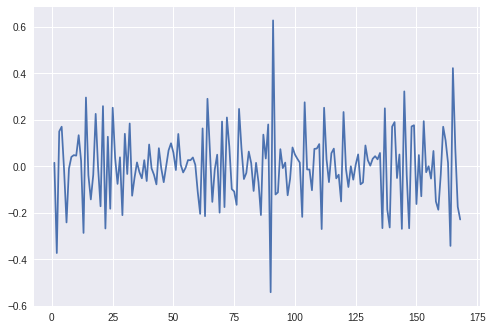

In [0]:
albAvo.reset_index().apply(lambda x: x.LogAveragePrice-quarterly_average[(x.Date.month-1)//3], axis=1).diff()[1:].plot()
plt.show()

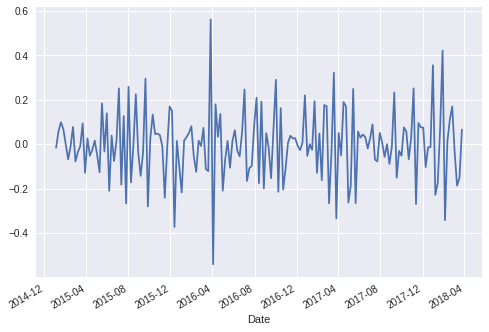

In [0]:
albAvo.diff()[1:].plot() # can use volume to explain variance in middle
#albAvo.reset_index().apply(lambda x: x.LogAveragePrice-quarterly_average[(x.Date.month-1)//3], axis=1).diff()[1:].plot()
plt.show()

In [0]:
#albAvo # diff and diff(52) were tried
mod = sm.tsa.statespace.SARIMAX(albAvo, order=(2,1,0), seasonal_order=(0,0,0,0), simple_differencing=True)
res = mod.fit(disp=False)
print(res.summary())

                           Statespace Model Results                           
Dep. Variable:      D.LogAveragePrice   No. Observations:                  168
Model:               SARIMAX(2, 0, 0)   Log Likelihood                 100.087
Date:                Thu, 01 Nov 2018   AIC                           -194.174
Time:                        16:45:19   BIC                           -184.802
Sample:                    12-20-2015   HQIC                          -190.370
                         - 01-07-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5583      0.069     -8.074      0.000      -0.694      -0.423
ar.L2         -0.3430      0.090     -3.823      0.000      -0.519      -0.167
sigma2         0.0177      0.002      8.993      0.0

In [0]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error

In [0]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [0]:
min_bic = 0
best_tuple = None

for p in [1,2,3,4,5,6,7,8]:
  for d in [0, 1]:
    for q in [0,1,2,3,4]:
#      if d > 0 and q > 0:
#        pass
      model = ARIMA(albAvo, order=(p,d,q))
      model_fit = model.fit(disp=0)
      if model_fit.bic < min_bic:
        min_bic = model_fit.bic
        best_tuple = (p,d,q)
print(min_bic, best_tuple)
#      print((p,d,q), model_fit.bic)
      #print((p, d, q), evaluate_arima_model(albAvo, (p,d,q)))
# (5, 0, 0) -189.18887997903266

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retval

ValueError: ignored

In [0]:
print(min_bic, best_tuple)

-198.9613095355785 (1, 0, 1)
